<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/PCA_on_New_York_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


**Load the Data**

In [2]:
NewYorkStock=pd.read_csv ("/content/drive/MyDrive/DATASETS/prices.csv")
print("Raw dataset first 10 rows:",NewYorkStock.head(10) )

Raw dataset first 10 rows:              date symbol        open       close         low        high  \
0   1/5/2016 0:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1   1/6/2016 0:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2   1/7/2016 0:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3   1/8/2016 0:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  1/11/2016 0:00   WLTW  117.010002  114.970001  114.089996  117.330002   
5  1/12/2016 0:00   WLTW  115.510002  115.550003  114.500000  116.059998   
6  1/13/2016 0:00   WLTW  116.459999  112.849998  112.589996  117.070000   
7  1/14/2016 0:00   WLTW  113.510002  114.379997  110.050003  115.029999   
8  1/15/2016 0:00   WLTW  113.330002  112.529999  111.919998  114.879997   
9  1/19/2016 0:00   WLTW  113.660004  110.379997  109.870003  115.870003   

    volume  
0  2163600  
1  2386400  
2  2489500  
3  2006300  
4  1408600  
5  1098000  
6   949600  
7   785300  
8  1093700  
9  152

In [3]:
print("NewYorkStock shape:", NewYorkStock.shape)

NewYorkStock shape: (851264, 7)


**Preprocessing**

In [4]:
## pivot
print("\nMissing values:")
print(NewYorkStock.isnull().sum())


Missing values:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


**EXPLARATORY DATA ANALYSIS**

# Filter for a few top stocks to keep it manageable (e.g., Apple, Microsoft, Google)

In [5]:

symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'IBM']
filtered_df = NewYorkStock[NewYorkStock['symbol'].isin(symbols)]
print("\nFiltered data shape:", filtered_df.shape)



Filtered data shape: (8810, 7)


# Pivot table: rows = date, columns = symbol, values = close price

In [6]:

pivot_df = filtered_df.pivot_table(index='date', columns='symbol', values='close')
pivot_df = pivot_df.dropna()  # drop dates with missing values
print("\nPivoted shape after dropping missing:", pivot_df.shape)


Pivoted shape after dropping missing: (1762, 5)


#  Normalize data

In [7]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot_df)

#  Apply PCA

In [8]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Explained variance

In [9]:

print("\nExplained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.52479182 0.32538226]


# Visualization

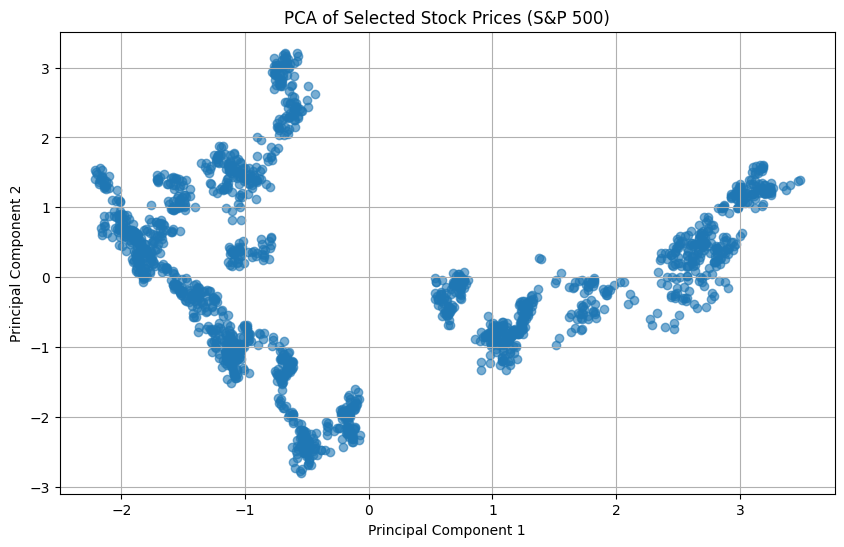

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title('PCA of Selected Stock Prices (S&P 500)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Interpretation

In [11]:

components_df = pd.DataFrame(pca.components_, columns=pivot_df.columns, index=['PC1', 'PC2'])
print("\nPrincipal Component Loadings:")
print(components_df)


Principal Component Loadings:
symbol      AAPL      AMZN      GOOG       IBM      MSFT
PC1    -0.532612  0.533231  0.018915 -0.343602  0.559972
PC2     0.310209  0.344805  0.688437  0.498700  0.249465


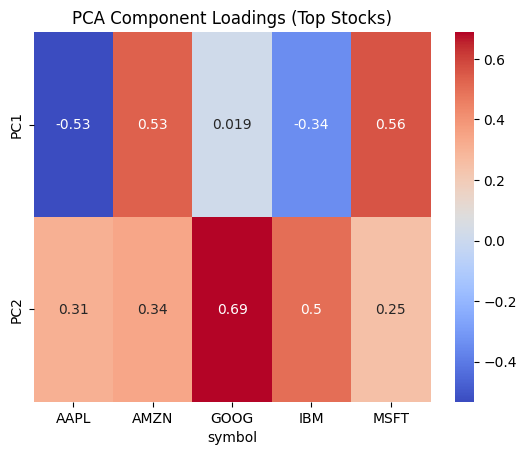

In [12]:


sns.heatmap(components_df, annot=True, cmap='coolwarm')
plt.title("PCA Component Loadings (Top Stocks)")
plt.show()